# (Ocassionally) Dishonest Casino Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, choice

In [2]:
%config InlineBackend.figure_format = "retina"

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
states = np.array([0, 1])
obs_states = np.arange(1, 7)

A = np.array([
    [0.95, 0.05],
    [0.10, 0.90]s
])

px = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], # fair die
    [1/10, 1/10, 1/10, 1/10, 1/10, 5/10] # loaded die
])

π = np.array([1, 1]) / 2

In [516]:
seed(314)
n_samples = 300

zt = choice(states, p=π)
xt = choice(obs_states, p=px[zt])

z_hist = np.zeros(n_samples, dtype=int)
x_hist = np.zeros(n_samples, dtype=int)

z_hist[0] = zt
x_hist[0] = xt
for t in range(1, n_samples):
    zt = choice(states, p=A[zt])
    xt = choice(obs_states, p=px[zt])
    
    z_hist[t] = zt
    x_hist[t] = xt

In [517]:
z_hist_str = "".join((z_hist + 1).astype(str))[:60]
x_hist_str = "".join(x_hist.astype(str))[:60]

print(f"x: {x_hist_str}")
print(f"z: {z_hist_str}")

x: 666333434452361543336162146653316146656663144434652652444446
z: 222222221111111111111111111111111112222222222222222211111111


In [466]:
def find_dishonest_intervals(z_hist):
    spans = []
    x_init = 0
    t = x_init
    for t, _ in enumerate(z_hist[:-1]):
        if z_hist[t+1] == 0 and z_hist[t] == 1:
            x_end = t
            spans.append((x_init, x_end))
        elif z_hist[t+1] == 1 and z_hist[t] == 0:
            x_init = t+1
    
    return spans

## The scaled-forward step

In [467]:
xh = x_hist - 1

In [468]:
α1 = π * px[:, xh[0]]
α1 = α1 / α1.sum()
α1

array([0.25, 0.75])

In [469]:
α2 = px[:, xh[1]] * (α1 * A).sum(axis=-1)
α2 = α2 / α2.sum()
α2

array([0.11579, 0.88421])

In [470]:
α2 = px[:, xh[2]] * (α2 * A).sum(axis=-1)
α2 = α2 / α2.sum()
α2

array([0.05986, 0.94014])

All together

In [471]:
α_hist = np.zeros((n_samples, 2))
c_elements = np.zeros(n_samples)

αn = π * px[:, xh[0]]
cn = αn.sum()
αn = αn / cn

α_hist[0] = αn
c_elements[0] = cn

for n in range(1, n_samples):
    αn = px[:, xh[n]] * (αn[:, None] * A).sum(axis=0)
    cn = αn.sum()
    αn = αn / cn
    
    α_hist[n] = αn
    c_elements[n] = cn

In [472]:
xspan = np.arange(1, n_samples + 1)

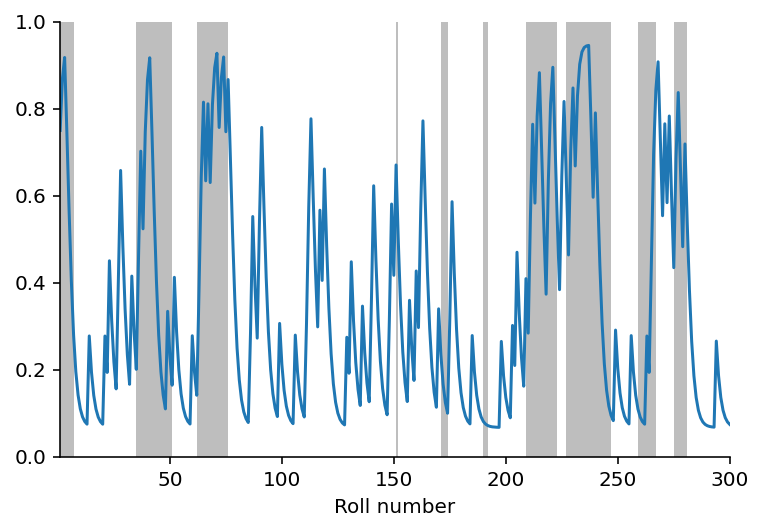

In [473]:
fig, ax = plt.subplots()

xrange = np.arange(n_samples)
spans = find_dishonest_intervals(z_hist)
ax.plot(xspan, α_hist[:, 1])
for span in spans:
    ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
ax.set_xlim(1, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Roll number");

## The scaled-backward step

In [474]:
β_next = np.ones(2)

β_hist = np.zeros((n_samples, 2))
β_hist[-1] = β_next

for n in range(2, n_samples + 1):
    β_next = (β_next * px[:, xh[-n+1]] * A).sum(axis=-1) / c_elements[-n+1]
    β_hist[-n] = β_next

In [475]:
np.set_printoptions(suppress=True, precision=5)

In [476]:
γ_hist = α_hist * β_hist
γ_hist.sum(axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

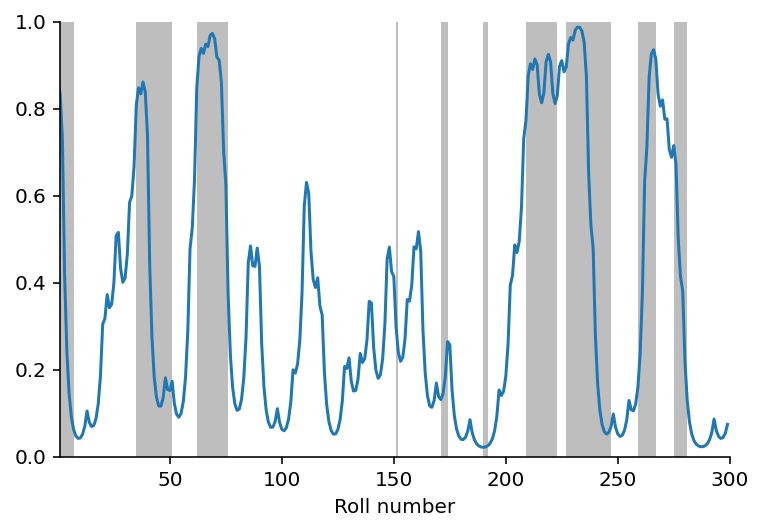

In [611]:
fig, ax = plt.subplots()

xrange = np.arange(n_samples)
spans = find_dishonest_intervals(z_hist)
ax.plot(xrange, γ_hist[:, 1])
for span in spans:
    ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
ax.set_xlim(1, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Roll number");

## The most likely path

In [478]:
zmap_hist = np.zeros

In [479]:
w1 = np.log(A) + np.log(π) + np.log(px[:, xh[0]])
w1 = w1.max(axis=0)
w1

array([-2.5362 , -1.49165])

In [480]:
w2 = np.log(A) + np.log(px[:, xh[1]]) + w1

w2 = w2.max(axis=0)
w2

array([-4.37925, -2.29016])

In [481]:
w3 = np.log(A) + np.log(px[:, xh[2]]) + w2

z3_map = w3.argmax(axis=0)
w3 = w3.max(axis=0)
w3, z3_map

(array([-6.22231, -3.08867]), array([0, 1]))

In [482]:
zmap_path = np.zeros((n_samples, 2))

All together

In [483]:
zmap_hist = np.zeros((n_samples, 2))
logp_hist = np.zeros((n_samples, 2))


wn = np.log(A) + np.log(π) + np.log(px[:, xh[0]])
zmap_n = wn.argmax(axis=1)
wn = wn.max(axis=1)

zmap_hist[0] = zmap_n
logp_hist[0] = wn


for n in range(1, n_samples):
    wn = np.log(A) + np.log(px[:, xh[n]]) + wn
    zmap_n = wn.argmax(axis=1)
    wn = wn.max(axis=1)

    zmap_hist[n] = zmap_n
    logp_hist[n] = wn

In [484]:
zmap_hist = logp_hist.argmax(axis=1)

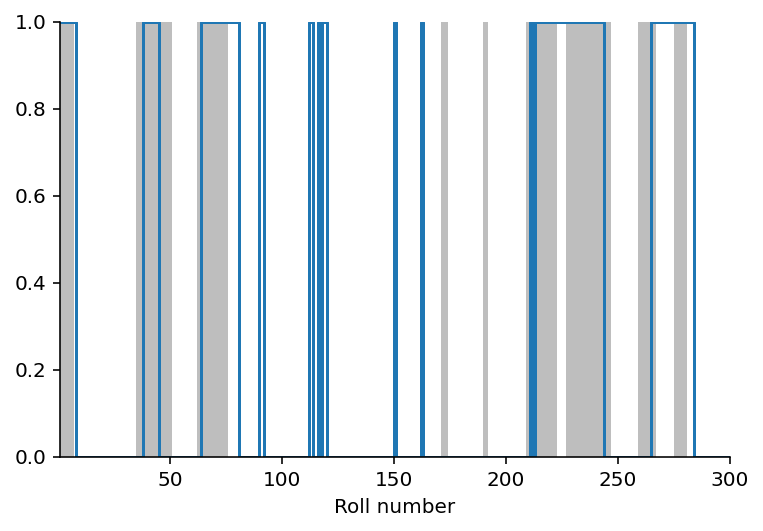

In [490]:
fig, ax = plt.subplots()

xrange = np.arange(n_samples)
spans = find_dishonest_intervals(z_hist)
plt.step(xrange, zmap_hist, where="post")
for span in spans:
    ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
ax.set_xlim(1, n_samples)
ax.set_ylim(0, 1);
ax.set_xlabel("Roll number");

# Code Cleaning

In [600]:
class HMMCasino:
    def __init__(self, A, px, π):
        """
        Occasionally dishonest casino example.
        This class simulates a Hidden Markov Model with
        categorical distribution
        
        Parameters
        ----------
        A: array(state_size, state_size)
            State transition matrix
        px: array(state_size, observation_size)
            Matrix of conditional categorical probabilities
            of obsering the ith category
        π: array(state_size)
            Array of initial-state probabilities
        """
        self.A = A
        self.px = px
        self.π = π
        self.state_size, self.observation_size = px.shape

    @staticmethod
    def find_dishonest_intervals(z_hist):
        """
        Find the span of timesteps that the
        simulated systems turns to be in state 1
        
        Parameters
        ----------
        z_hist: array(n_samples)
            Result of running the casino with two
            latent states
        
        Returns
        -------
        list of tuples with span of values
        """
        spans = []
        x_init = 0
        t = x_init
        for t, _ in enumerate(z_hist[:-1]):
            if z_hist[t+1] == 0 and z_hist[t] == 1:
                x_end = t
                spans.append((x_init, x_end))
            elif z_hist[t+1] == 1 and z_hist[t] == 0:
                x_init = t+1
        return spans
    
    def plot_inference(self, inference_values, z_hist, ax, state=1, map_estimate=False):
        """
        Plot the inference in the dishonest casino.
        "Vertical gray bars denote times when the hidden
        state corresponded to loaded die. Blue lines represent the
        posterior probability of being in that state given diﬀerent subsets
        of observed data." See Markov and Hidden Markov models for more info
        
        Parameters
        ----------
        inference_values: array(n_samples, state_size)
            Result of runnig smoothing method
        z_hist: array(n_samples)
            Latent simulation
        ax: matplotlib.axes
        state: int
            Decide which state to highlight
        map_estimate: bool
            Whether to plot steps (simple plot if False)
        """
        n_samples = len(inference_values)
        xspan = np.arange(1, n_samples + 1)
        spans = self.find_dishonest_intervals(z_hist)
        if map_estimate:
            ax.step(xspan, inference_values, where="post")
        else:
            ax.plot(xspan, inference_values[:, state])

        for span in spans:
            ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
        ax.set_xlim(1, n_samples)
        ax.set_ylim(0, 1)
        ax.set_xlabel("Roll number")
        
    def sample(self, n_samples, random_state=None):
        """
        Sample n_samples states of the casino
        
        Parameters
        ----------
        n_samples: int
            Number of iterations in the process
        random_state: int or None
            random state of the system
        
        Returns
        -------
        * array(n_samples)
            History of latent states
        * array(n_samples)
            History of observed states
        """
        seed(random_state)
        latent_states = np.arange(self.state_size)
        obs_states = np.arange(self.observation_size)
        
        z_hist = np.zeros(n_samples, dtype=int)
        x_hist = np.zeros(n_samples, dtype=int)
        
        zt = choice(latent_states, p=self.π)
        xt = choice(obs_states, p=self.px[zt])
        z_hist[0] = zt
        x_hist[0] = xt
        
        for t in range(1, n_samples):
            zt = choice(latent_states, p=A[zt])
            xt = choice(obs_states, p=px[zt])
            z_hist[t] = zt
            x_hist[t] = xt
        return z_hist, x_hist

    def _forward_step(self, x_hist):
        """
        Compute the "filtering" step of the casino HMM
        
        Parameters
        ----------
        x_hist: array(n_samples)
            History of observed states
            
        Returns
        -------
        * array(n_samples, state_size)
            Posterior over hidden states given the data seen
        """
        n_samples = len(x_hist)
        α_hist = np.zeros((n_samples, self.state_size))
        c_elements = np.zeros(n_samples)
        
        αn = self.π * self.px[:, x_hist[0]]
        cn = αn.sum()
        αn = αn / cn

        α_hist[0] = αn
        c_elements[0] = cn

        for n in range(1, n_samples):
            αn = px[:, x_hist[n]] * (αn[:, None] * self.A).sum(axis=0)
            cn = αn.sum()
            αn = αn / cn

            α_hist[n] = αn
            c_elements[n] = cn
        
        return α_hist, c_elements
    
    def _forward_backwards_step(self, x_hist):
        """
        Compute the intermediate smoothing step of the casino HMM.
        First compute the "filtering" terms and then the "forward" elements
        required to compute the smoothing elements
        
        Parameters
        ----------
        x_hist: array(n_samples)
            History of observed states
            
        Returns
        -------
        * array(n_samples, state_size)
            Posterior over hidden states given the data seen
        * array(n_samples, state_size)
            Intermediate elements to compute the smoothing term
        * array(n_samples)
            Coefficients 
        """
        n_samples = len(x_hist)
        α_hist, c_elements = self._forward_step(x_hist)
        β_next = np.ones(self.state_size)

        β_hist = np.zeros((n_samples, self.state_size))
        β_hist[-1] = β_next

        for n in range(2, n_samples + 1):
            β_next = (β_next * self.px[:, x_hist[-n+1]] * self.A).sum(axis=-1) / c_elements[-n+1]
            β_hist[-n] = β_next
        
        return α_hist, β_hist, c_elements
    
    def filter_smooth(self, x_hist):
        """
        Compute the "filtering" and "smoothing" steps of the dishnoest casino
        
        Parameters
        ----------
        x_hist: array(n_samples)
            History of observed states
            
        Returns
        -------
        Dictionary:
        * filtering: array(n_samples, state_size)
            Posterior over hidden states given the data seen
        * smoothing: array(n_samples, state_size)
            Posterior over hidden states conditional on all the data
        """ 
        α_hist, β_hist, c_elements = self._forward_backwards_step(x_hist)
        γ_hist = α_hist * β_hist
        
        return {
            "filtering": α_hist,
            "smoothing": γ_hist
        }
    
    def map_state(self, x_hist):
        """
        Compute the most probable sequence of states

        Parameters
        ----------
        x_hist: array(n_samples)
            History of observed states
        
        Returns
        -------
        * array(n_samples)
            Sequence of most MAP probable sequence of states
        """
        n_samples = len(x_hist)
        logp_hist = np.zeros((n_samples, self.state_size))
        wn = np.log(self.A) + np.log(self.π) + np.log(self.px[:, x_hist[0]])
        wn = wn.max(axis=1)
        logp_hist[0] = wn

        for n in range(1, n_samples):
            wn = np.log(self.A) + np.log(self.px[:, x_hist[n]]) + wn
            zmap_n = wn.argmax(axis=1)
            wn = wn.max(axis=1)
            logp_hist[n] = wn
            
        return logp_hist.argmax(axis=1)

In [601]:
casino = HMMCasino(A, px, π)
z_hist, x_hist = casino.sample(n_samples, 314)

z_hist_str = "".join((z_hist + 1).astype(str))[:60]
x_hist_str = "".join((x_hist + 1).astype(str))[:60]

print(f"x: {x_hist_str}")
print(f"z: {z_hist_str}")

x: 666333434452361543336162146653316146656663144434652652444446
z: 222222221111111111111111111111111112222222222222222211111111


In [602]:
res = casino.filter_smooth(x_hist)
z_map = casino.map_state(x_hist)

filtering = res["filtering"]
smoothing = res["smoothing"]

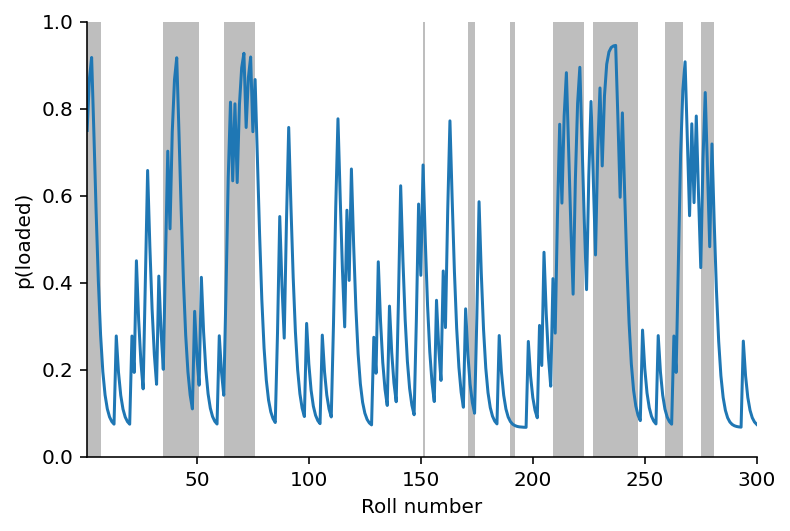

In [621]:
fig, ax = plt.subplots()
casino.plot_inference(filtering, z_hist, ax)
ax.set_ylabel("p(loaded)");

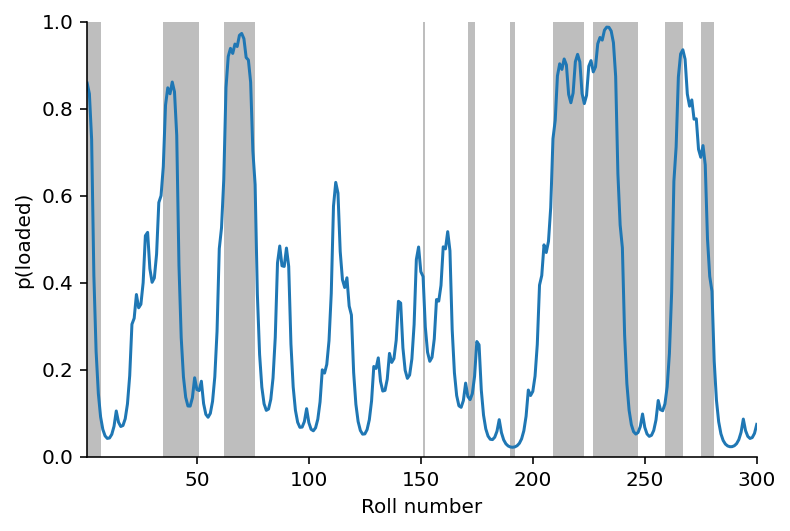

In [620]:
fig, ax = plt.subplots()
casino.plot_inference(smoothing, z_hist, ax)
ax.set_ylabel("p(loaded)");

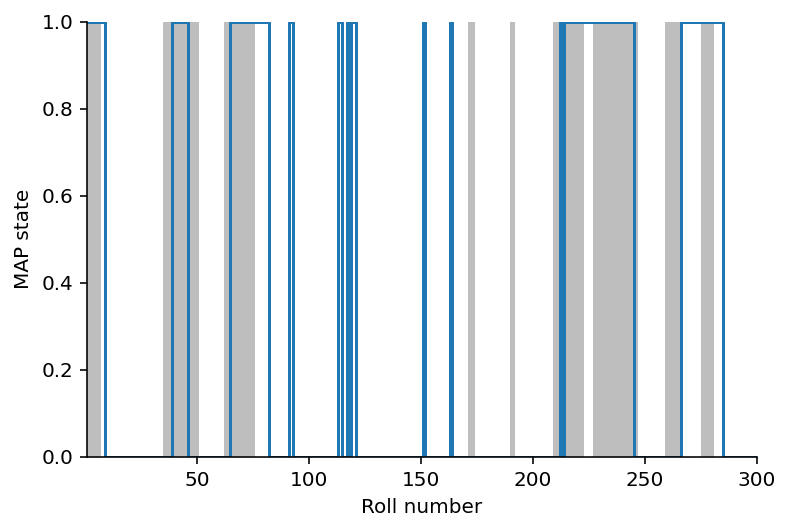

In [623]:
fig, ax = plt.subplots()
casino.plot_inference(z_map, z_hist, ax, map_estimate=True)
ax.set_ylabel("MAP state");